In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
plt.style.use('ggplot')
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv('car.csv')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [32]:
print(f"Dataset has {df.shape[0]} rows and {df.shape[1]} columns")

Dataset has 205 rows and 27 columns


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CompanyName       205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [34]:
car_features = [car for car in df.columns if df[car].dtype == '0']
print(f"The dataset has total {len(car_features)} categorical attributes")

The dataset has total 0 categorical attributes


In [35]:
num_features = [num for num in df.columns if df[num].dtype != '0']
print(f"the dataset has total  {len(num_features)} numerical attributes")

the dataset has total  27 numerical attributes


In [36]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [37]:
# Checking for missing value in dataset
df.isnull().sum()

car_ID              0
symboling           0
CompanyName         0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
mean                0
dtype: int64

In [38]:
#Checking for duplicate values
df[df.duplicated()].sum()

car_ID              0.0
symboling           0.0
CompanyName         0.0
fueltype            0.0
aspiration          0.0
doornumber          0.0
carbody             0.0
drivewheel          0.0
enginelocation      0.0
wheelbase           0.0
carlength           0.0
carwidth            0.0
carheight           0.0
curbweight          0.0
enginetype          0.0
cylindernumber      0.0
enginesize          0.0
fuelsystem          0.0
boreratio           0.0
stroke              0.0
compressionratio    0.0
horsepower          0.0
peakrpm             0.0
citympg             0.0
highwaympg          0.0
price               0.0
mean                0.0
dtype: float64

# Data ***Cleaning***

In [11]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [12]:
# We can separate the car company names from Carname feature.
Company_Name = df['CarName'].apply(lambda x : x.split(" ")[0])
df.insert(2,"CompanyName",Company_Name)
df.drop(columns=['CarName'], axis=1,inplace=True)
df.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [13]:
#Checking for unique car company
df['CompanyName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [39]:
def replace(a,b):
  df['CompanyName'].replace(a,b,inplace=True)
replace('maxda','mazda')
replace('porcshce','porsche')
replace('toyoute','toyota')
replace('vokswagen','volkswagen')
replace('vw','volkswagen')


In [15]:
# Checking for unique car company
df["CompanyName"].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche', 'renault',
       'saab', 'subaru', 'toyota', 'toyouta', 'volkswagen', 'volvo'],
      dtype=object)

## Visualizing Data

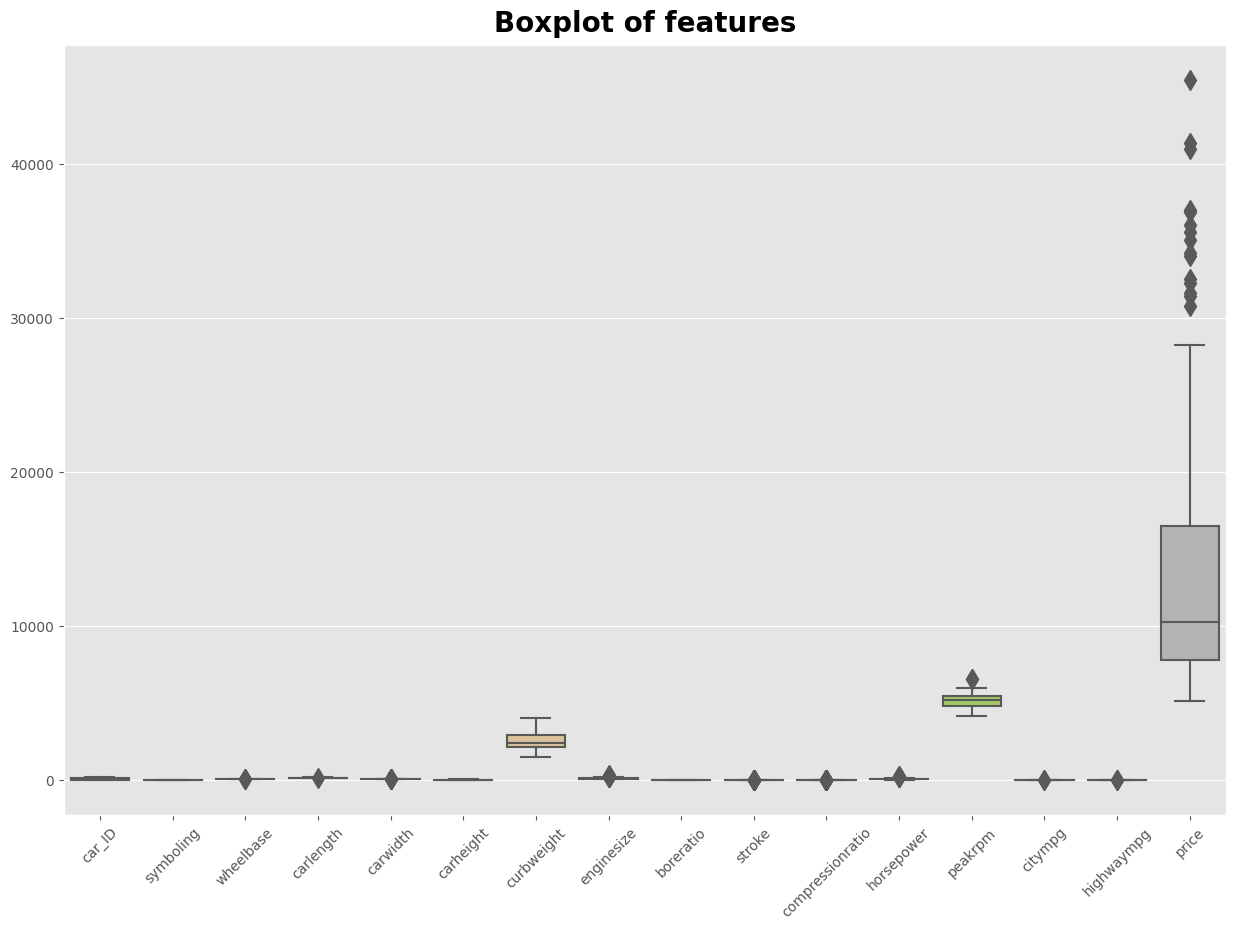

In [16]:
#Checking For Outliers
plt.figure(figsize=(15,10))
sns.boxplot(df, palette="Set2",width=0.8,fliersize=10)
plt.title('Boxplot of features', pad=10,fontweight='black',fontsize=20)
plt.xticks(rotation=45)
plt.show()

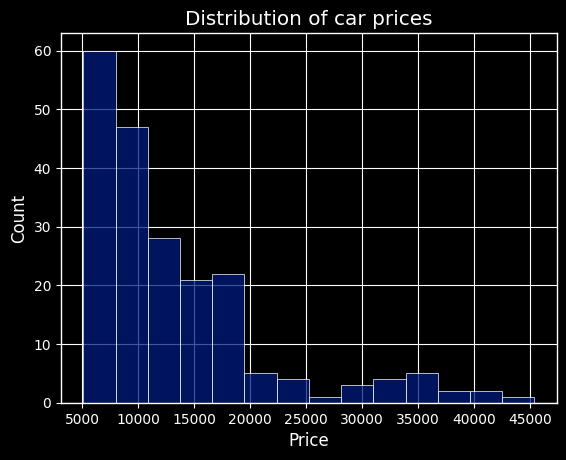

In [17]:
plt.style.use('dark_background')
sns.set_palette('dark')
sns.histplot(df['price'])
plt.title('Distribution of car prices',color='white')
plt.xlabel('Price',color='white')
plt.ylabel('Count',color='white')
plt.xticks(color='white')
plt.yticks(color='white')
plt.show()



In [29]:
print(df.corr())

                    car_ID  symboling  wheelbase  carlength  carwidth  \
car_ID            1.000000  -0.151621   0.129729   0.170636  0.052387   
symboling        -0.151621   1.000000  -0.531954  -0.357612 -0.232919   
wheelbase         0.129729  -0.531954   1.000000   0.874587  0.795144   
carlength         0.170636  -0.357612   0.874587   1.000000  0.841118   
carwidth          0.052387  -0.232919   0.795144   0.841118  1.000000   
carheight         0.255960  -0.541038   0.589435   0.491029  0.279210   
curbweight        0.071962  -0.227691   0.776386   0.877728  0.867032   
enginesize       -0.033930  -0.105790   0.569329   0.683360  0.735433   
boreratio         0.260064  -0.130051   0.488750   0.606454  0.559150   
stroke           -0.160824  -0.008735   0.160959   0.129533  0.182942   
compressionratio  0.150276  -0.178515   0.249786   0.158414  0.181129   
horsepower       -0.015006   0.070873   0.353294   0.552623  0.640732   
peakrpm          -0.203789   0.273606  -0.360469  -

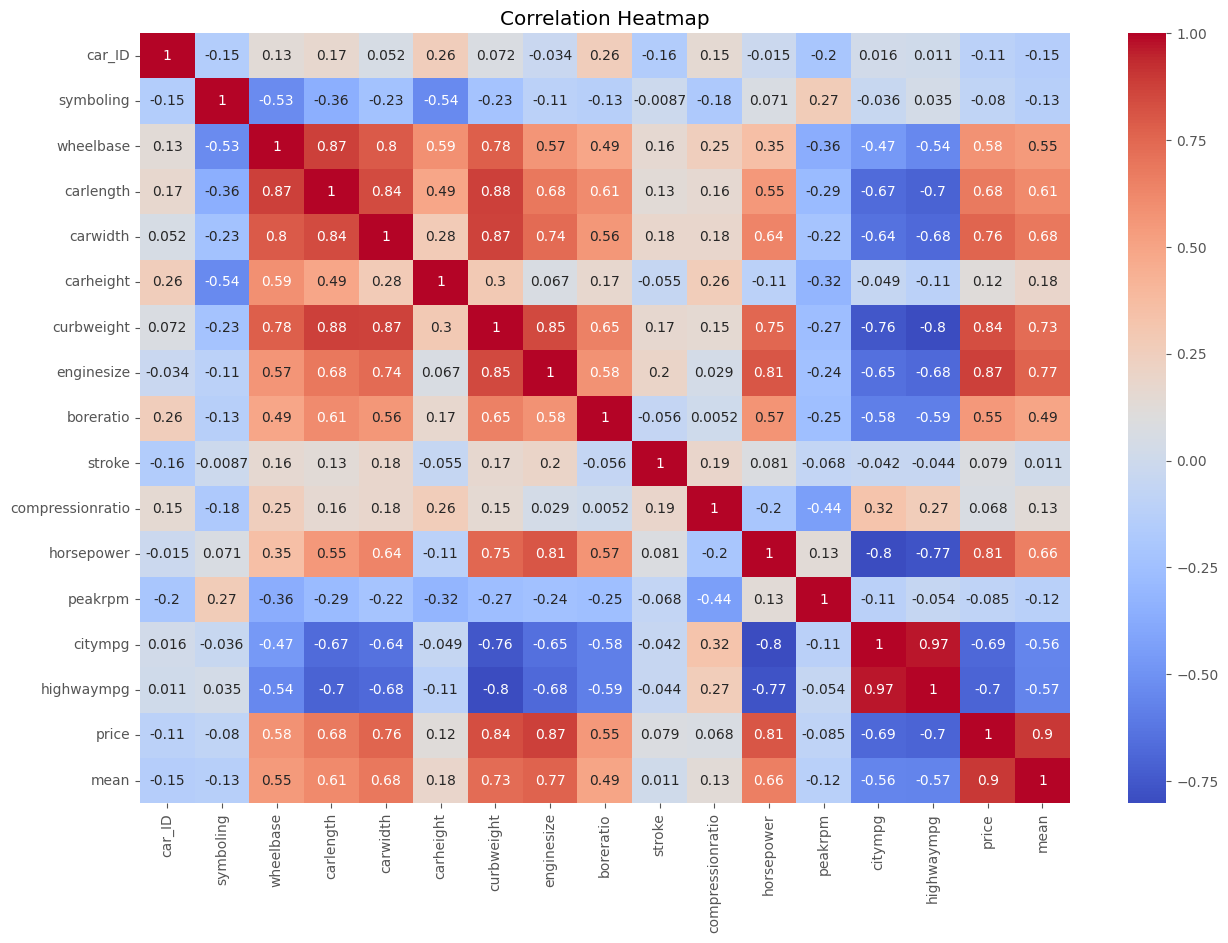

In [30]:
plt.figure(figsize=(15,10))
correlations= df.corr()
sns.heatmap(correlations, cmap="coolwarm", annot=True)
plt.title('Correlation Heatmap', color='black')
plt.show()

## Data Preprocessing

In [24]:
feature_cols= ['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation',
               'wheelbase','carlength','carwidth','carheight','curbweight','enginetype','cylindernumber',
               'enginesize','fuelsystem','boreratio','stroke','compressionratio','horsepower','peakrpm',
               'citympg','highwaympg']

target_col = 'price'
x= df[feature_cols]
y = df[target_col]

In [27]:
label_encoder = LabelEncoder()

for col in x.columns:
  if x[col].dtype == 'object':
    x[col] = label_encoder.fit_transform(x[col])

In [ ]:
z = round(df.groupby(["CompanyName"])["price"].agg(["mean"]),2).T
z

CompanyName,Nissan,alfa-romero,audi,bmw,buick,chevrolet,dodge,honda,isuzu,jaguar,...,peugeot,plymouth,porsche,renault,saab,subaru,toyota,toyouta,volkswagen,volvo
mean,5499.0,15498.33,17859.17,26118.75,33647.0,6007.0,7875.44,8184.69,8916.5,34600.0,...,15489.09,7963.43,31400.5,9595.0,15223.33,8541.25,9696.65,15750.0,10077.5,18063.18


## Training a Car Price Predication Model

In [ ]:
predict="price"
df=df[["symboling","wheelbase","carlength","carwidth","carheight","curbweight","enginesize","boreratio",
        "compressionratio","horsepower","peakrpm","citympg","highwaympg","price"]]

x= np.array(df.drop([predict],1))
y = np.array(df[predict])

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest, = train_test_split(x,y,test_size=0.2)

from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor()
model.fit(xtrain, ytrain)
predictions = model.predict(xtest)

from sklearn.metrics import mean_absolute_error
model.score(xtest,predictions)

1.0